# Анализ рынка игровых платформ

## Оглавление:
* [1. Введение. Описание проекта](#first-bullet)

* [2. Подготовка данных](#second-bullet)
   
* [3. Исследовательский анализ данных](#3-bullet)

* [4. Портрет пользователя в регионах продаж](#4-bullet)

* [5. Проверка гипотез](#5-bullet)

* [6. Общий вывод](#6-bullet)

<a class="anchor" id="first-bullet"></a>

## 1. Введение. Описание проекта

Для оценки перспективы рынка игровых платформ проводится анализ факторов, определяющий коммерческий успех игр. Анализ проводится на основе общедоступных исторических данных параметров игр: объемы продаж, оценки пользователей и экспертов, жанры и платформы. Периоды данных представлены с 1980 по 2015 полностью, 2016 год - частично.

<a class="anchor" id="second-bullet"></a>

## 2. Подготовка данных

Описание данных<br>

Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы долларов)<br>
EU_sales — продажи в Европе (миллионы долларов)<br>
JP_sales — продажи в Японии (миллионы долларов)<br>
Other_sales — продажи в других странах (миллионы долларов)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board), определяющей рейтинг компьютерных игр и присваивающей им подходящую возрастную категорию.<br>

In [68]:
#для анализа будут использоваться python - библиотеки: Pandas, Scipy, NumPy, Matplotlib, Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from pandas.plotting import table

In [69]:
#предустановка общих параметров графиков
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

In [70]:
games = pd.read_csv('/datasets/games.csv')

In [71]:
#агрегирование нужной информации о датасете. Реализовано с целью улучшения визуалиции информации.

entries_count = pd.DataFrame(games.nunique())
entries_count.columns = ['values_counts']

columns_types = pd.DataFrame(games.dtypes)
columns_types.columns = ['dtypes']
columns_types

entries_count_isnull = pd.DataFrame(games.isnull().sum())
entries_count_isnull.columns = ['isnull_counts']
entries_count_isnull

games_intro_info = entries_count.join(columns_types)\
                               .join(entries_count_isnull)


display(games.shape)
games_intro_info.transpose()

(16715, 11)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
values_counts,11559,31,37,12,402,307,244,155,82,96,8
dtypes,object,object,float64,object,float64,float64,float64,float64,float64,object,object
isnull_counts,2,0,269,2,0,0,0,0,8578,6701,6766


Датасет представлен данными о 17 тыс. игр. Есть поля с отсуствующими значениями. Данные пропуски носят как случайный характер, так и связанны с особенностями рассматриваемой индустрии. Заполнение их расчётными значениями может привезти к искажению параметров выборки. <br>
<br>

Отработка пропусков будет прозведена следующим образом.<br>
<br>
Строки с отсутсвующими значениями в полях "Name", "Year_of_Release", "Genre" будут удалены, в связи с маленьким количеством строк.<br>
Пропуски в оценках критиков и пользователей остаются, т.к. ситуация по каждой игре является уникальной.<br>
Значение поля "user_Score" равное "tbd" означает, что рейтинг находится в процессе формирования, т.е. значение отсутсвует.<br>
<br>
Для дальнейшего исследования будет расчитан столбец "total_sales" с общим объемом продаж (сумма всех региональных продаж).


In [72]:
#перевод названий столбцов в нижний регистр
games = games.rename(str.lower, axis='columns')

#удаление строк с пропусками
games = games.dropna(subset = ['name', 'year_of_release'])

#замена значения 'tbd' и типов данных
games = games.astype({'year_of_release': 'int64'})
games['user_score'] = games['user_score'].replace('tbd', np.nan).astype('float64')

#расчёт общих продаж
games['total_sales'] = games['na_sales'] + games['eu_sales']\
                       + games['jp_sales'] + games['other_sales']

<a class="anchor" id="3-bullet"></a>

## 3. Исследовательский анализ данных

Далее визиализируются данные в соответствии с легендой исследования. Выводы по исследуемым параметрам приведены после соответствующего блока графиков. Учитывая неполный характер данных за 2016 год из базы расчёта данный период исключается.

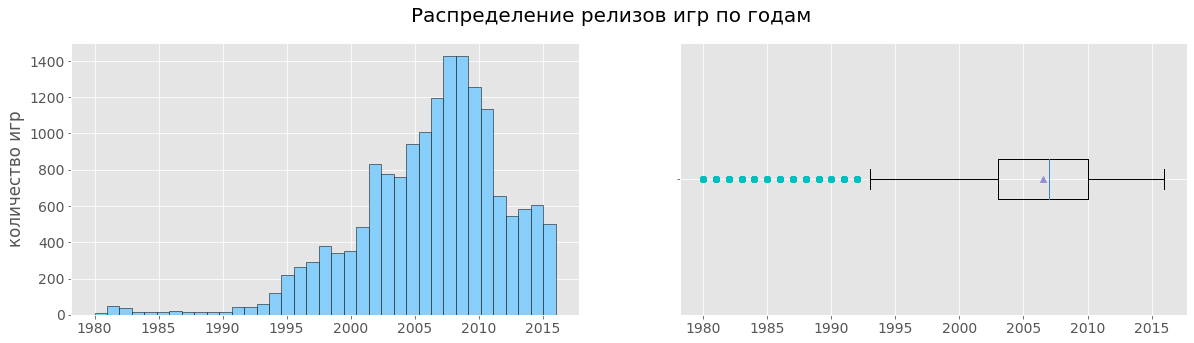

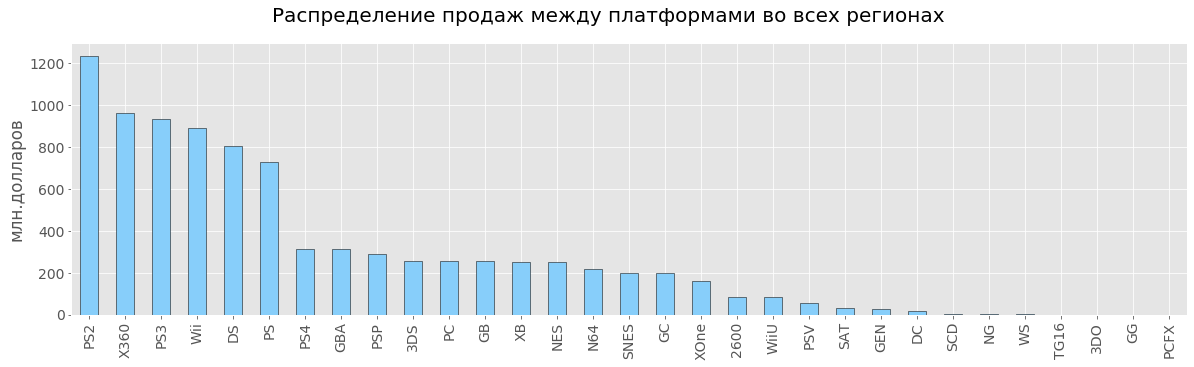

In [73]:
fig, axs =  plt.subplots(1,2, figsize = (20, 5))

fig.suptitle("Распределение релизов игр по годам", fontsize=20)

axs[0].hist(games['year_of_release'], bins = len(games['year_of_release'].unique()), color='lightskyblue',\
            edgecolor="black")
axs[1].boxplot(games['year_of_release'], 0, 'c', 0, showmeans = True)

axs[0].set_ylabel('количество игр')
axs[1].set_yticklabels([''])


fig, axs = plt.subplots()
fig.suptitle("Распределение продаж между платформами во всех регионах ", fontsize=20)
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind = 'bar', figsize = (20,5), edgecolor="black", color='lightskyblue')

axs.set_xlabel('')
axs.set_ylabel('млн.долларов')


plt.show()

Полноценное коммерческое развитие индустрии началось в 1993, пик пришёлся на 2008-2009, текущий тренд снижающийся.
В качестве безусловных лидеров можно выделить 6 платформ.

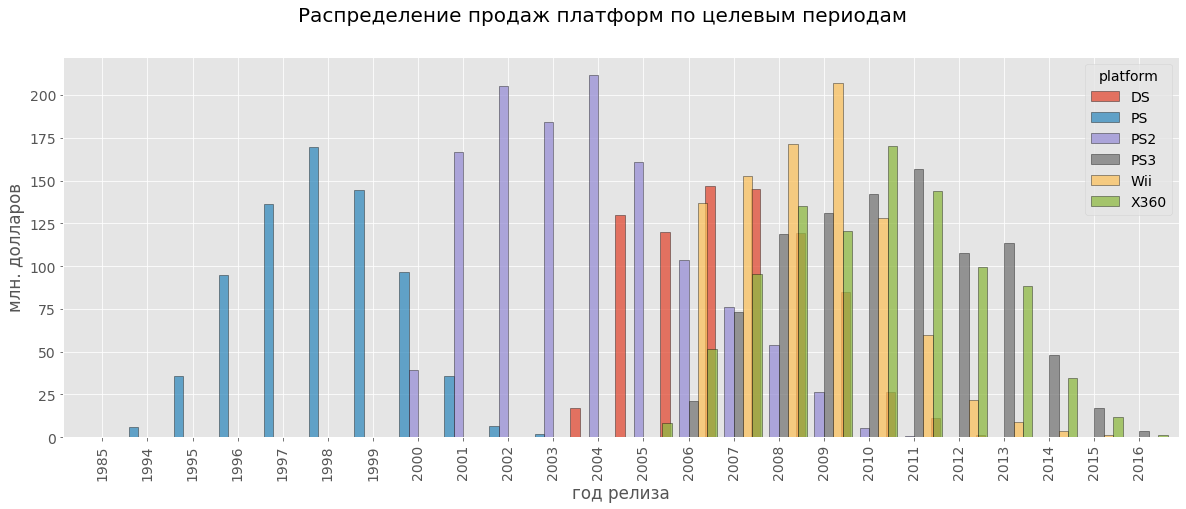

In [74]:
platform_best_sales = platform_sales.head(6).index

fig, ax = plt.subplots()

fig.suptitle("Распределение продаж платформ по целевым периодам", fontsize=20)

games.query('platform.isin(@platform_best_sales)')\
                .groupby(['year_of_release','platform'])['total_sales']\
                .sum().sort_values(ascending=False)\
                .unstack()\
                .plot(kind = 'bar', figsize = (20,7), edgecolor="black", width = 1.25, alpha = 0.75, ax=ax)
ax.set_ylabel('млн. долларов')
ax.set_xlabel('год релиза')

plt.show()

In [128]:
# уточнение продолжительности жизни и роста платформ
life_cycle = games.query('platform.isin(@platform_best_sales)')\
            .pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ('min', 'max'))

year_best = games.query('platform.isin(@platform_best_sales)')\
            .pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')\
            .sort_values(by = ['platform', 'total_sales'], ascending=False)\
            .reset_index()\
            .drop_duplicates(subset='platform')\
            .set_index('platform')

life_cycle = life_cycle.join(year_best)
life_cycle['year_life'] = life_cycle['max'] -  life_cycle['min']
life_cycle['best_year'] = life_cycle['year_of_release'] -  life_cycle['min']

life_cycle = life_cycle.query('platform != "DS"')

print('Медиана продолжительности жизненного цикла платформы, лет:', life_cycle['year_life'].median())
print('Медиана срока достижения максимума продаж, лет:', life_cycle['best_year'].median())
display(life_cycle)


Медиана продолжительности жизненного цикла платформы, лет: 10.0
Медиана срока достижения максимума продаж, лет: 4.0


,max,min,year_of_release,total_sales,year_life,best_year
platform,,,,,,
PS,2003,1994,1998,169.49,9,4
PS2,2011,2000,2004,211.81,11,4
PS3,2016,2006,2011,156.78,10,5
Wii,2016,2006,2009,206.97,10,3
X360,2016,2005,2010,170.03,11,5


Из расчёта исключены данные платформы DS, жизненный цикл которой составил 28 лет.

In [78]:
platforms_change = games.query('2011 <= year_of_release <= 2015')

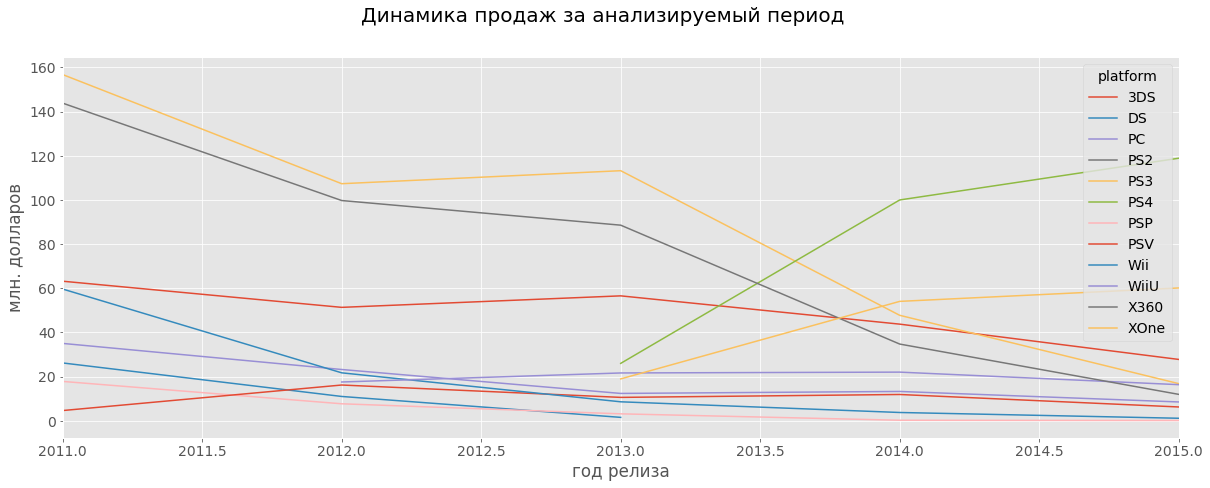

In [79]:
fig, ax = plt.subplots(figsize = (20,5))
fig.suptitle("Динамика продаж за анализируемый период", fontsize=20)

platforms_change.groupby(['year_of_release','platform'])['total_sales'].sum().sort_values(ascending = False)\
                .unstack().plot(ax=ax, figsize = (20, 7))

ax.set_ylabel('млн. долларов')
ax.set_xlabel('год релиза')

plt.show()

Учитывая продолжительность жизненного цикла платформ - лидеров, за базу расчёта принимаются данные за период 2011 - 2015. Из вышеприведённого графика очевидно, что продажи растут только у двух платформ.

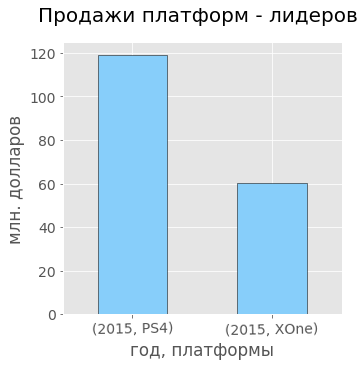

In [178]:
fig, ax = plt.subplots(figsize = (5,5))
fig.suptitle("Продажи платформ - лидеров", fontsize=20)

platforms_change.query('year_of_release == 2015')\
    .groupby(['year_of_release','platform'])['total_sales'].sum().sort_values(ascending=False).head(2)\
    .plot(kind = 'bar', color='lightskyblue', edgecolor="black", rot=1)

ax.set_ylabel('млн. долларов')
ax.set_xlabel('год, платформы')

plt.show()

Платформами с растущими продажами являются только две - PS4 и XOne. Первая лидирует с двухкратным преимуществом.

In [81]:
ps4 = platforms_change.query('platform == "PS4"')
XOne = platforms_change.query('platform == "XOne"')

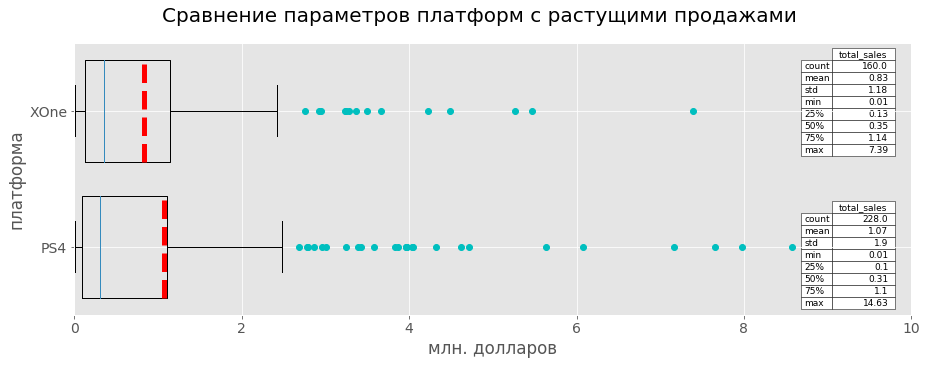

In [112]:
fig1, ax1 = plt.subplots(figsize = (15,5))

table(ax1, np.round(XOne['total_sales'].describe(), 2), loc='upper right', colWidths=[0.075])
table(ax1, np.round(ps4['total_sales'].describe(), 2), loc='lower right', colWidths=[0.075])
ax1.boxplot([ps4['total_sales'], XOne['total_sales']], 0, 'c', 0, widths = 0.75, meanline=True, showmeans=True, \
            meanprops = dict(linestyle='--', linewidth=5, color='red'), labels = ('PS4', 'XOne'))

ax1.set_xlim(0,10)
ax1.set_xlabel('млн. долларов')
ax1.set_ylabel('платформа')

fig1.suptitle("Сравнение параметров платформ с растущими продажами", fontsize=20)


plt.show()

PS4 и XOne обладаются схожими структурными характеристиками продаж, однако PS4 обладает рядом игр-бестселлеров, которые обеспечивают ей лидерство в среднем значении продаж - 1,07 vs 0,83 млн. долл.

In [141]:
life_cycle.index

Index(['PS', 'PS2', 'PS3', 'Wii', 'X360'], dtype='object', name='platform')

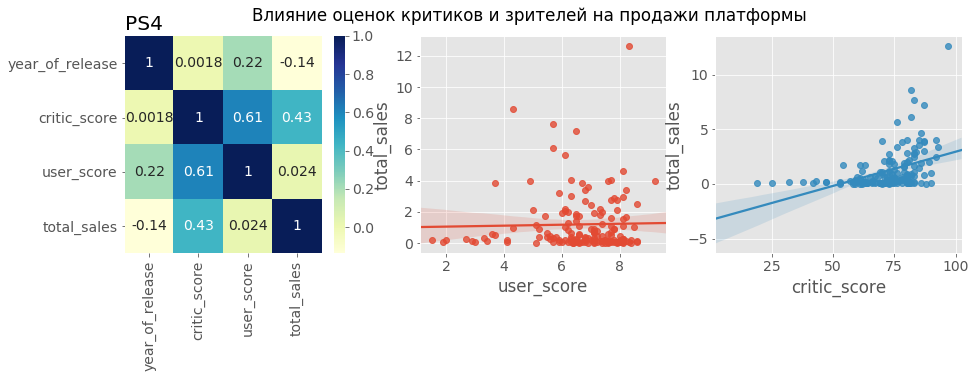

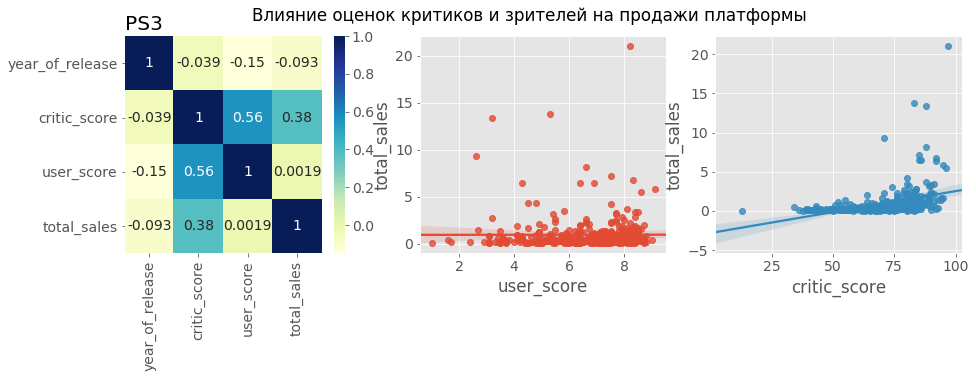

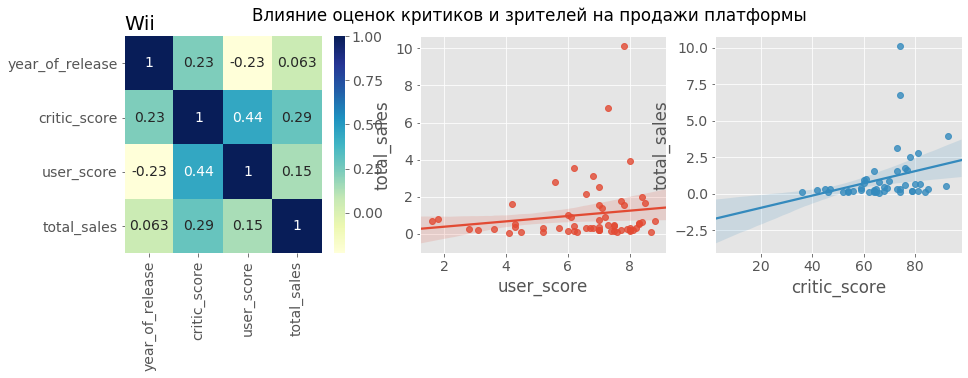

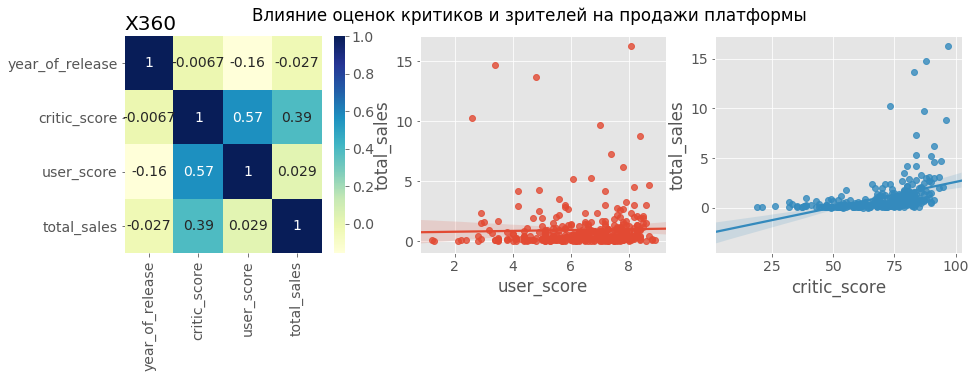

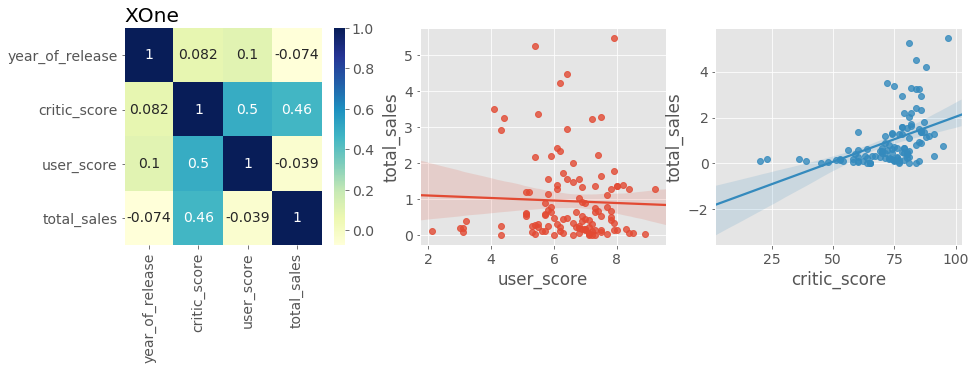

In [176]:
platform_list = ['PS4', 'PS3', 'Wii', 'X360', 'XOne']

for name in platform_list:
    games_name = platforms_change.query('platform == @name')
    fig.suptitle('Влияние оценок критиков и зрителей на продажи платформы')
    
    fig, ax =plt.subplots(1,3, figsize = (15, 4))
    ax[0].set_title(name, loc = 'left')
    
    sns.heatmap(games_name[['year_of_release', 'critic_score', 'user_score', 'total_sales']].corr(),
                ax = ax[0], annot = True, cmap="YlGnBu")
    sns.regplot(y="total_sales", x="user_score", data=games_name, ax = ax[1])
    sns.regplot(y="total_sales", x="critic_score", data=games_name,  ax = ax[2])
    

plt.show()

Наблюдается слабая корреляция продаж с оценками критиков и полное отсутствие влияния оценок зрителей.

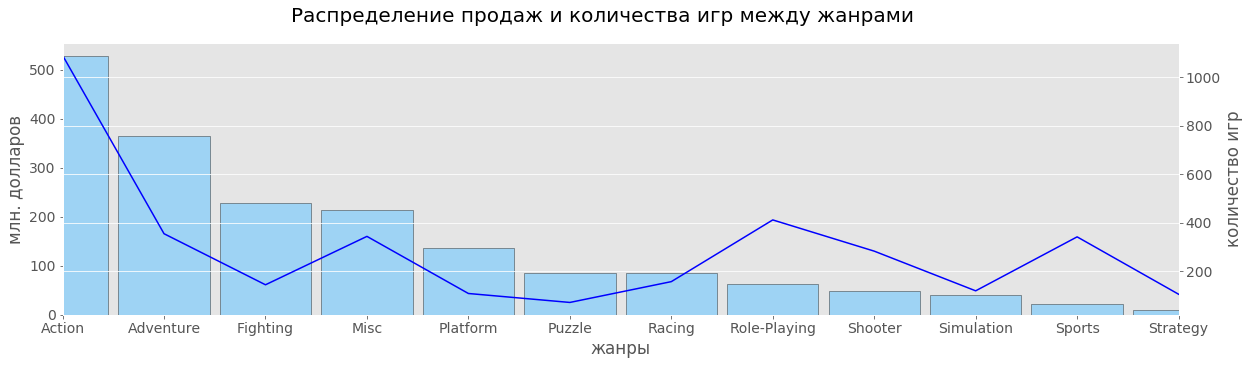

In [84]:
fig, ax = plt.subplots()
fig.suptitle('Распределение продаж и количества игр между жанрами', fontsize = 20)

platforms_change.groupby(['genre'])['total_sales']\
                .sum().sort_values(ascending=False)\
                .plot(kind = 'bar', figsize = (20,5), color='lightskyblue', 
                      edgecolor="black", width = 0.9, alpha = 0.75)
platforms_change.groupby(['genre'])['total_sales']\
                .count().plot(secondary_y=True, style='b')

ax.set_xlabel('жанры')
ax.set_ylabel('млн. долларов')
ax.right_ax.set_ylabel('количество игр')

plt.show()

Глобально пользователи предпочитают жанры "Action" и "Advanture".

<a class="anchor" id="4-bullet"></a>

Таким образом, в качестве промежуточного результата можно сделать следующие выводы.

   - Индустрия компьтерных игр начала развиваться с началом массового использования персональных компютеров. Старт коммерчески значимых продаж произошёл в 1993 году и до 2008 года происходил их экспоненциальный рост. В 2009 году - стагнация, а затем спад в индустрии, который в настоящее время фиксируется на уровне 2000 года или около 550 млн. долл.
   - В исторической перспективе выделяются 6 платформ с наибольшим объемом продаж - 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', т.е. 3 поколения PlayStation от Sony занимают первое место, игровая консоль X360 от Microsoft имеет вторую позицию, в роли второстепенных лидеров выступают Wii и DS от Nintendo.
   - Ретроспективный анализ показывает, что жизненный цикл игровой платформы составляет 10-11 лет, период роста - 5 лет.
   - Спад продаж связан с системными явлениями в индустрии, рассуждения о причинах которых будут сделаны далее. Анализ в рамках выявленного жизненного цикла платформ показал, что растут только продажи платформ последнего поколения от лидеров рынка - Sony (PS4) и Microsoft(XOne).
   - Интересным исследованием является определение зависимости продаж от оценок выставляемых пользователями и профессионалами индустрии. На примере растущих платформ была выявлена слабая корреляция (линейный коэффициент Пирсона: для XOne - 0,46, для PS4-0.43) между оценками критиков и продажами. Между оценками пользователей и продажами корреляция отсутствует. Данный факт свидетельствует о слишком малой доле пользователей публично оценивающих свой потенциал от игры. Оценки критиков имеют больший охват, однако эта сфера также слабо развита и не может служить основой для принятия решения о коммерческом потенциале игры.
   - На протяжении всей истории индустрии наибольшее количество игр и продаж пришлось на жанры ""Action" и "Advanture", как вызывающих наибольший эмоциональный отклик у пользователей.

## 4. Портрет пользователя в регионах продаж

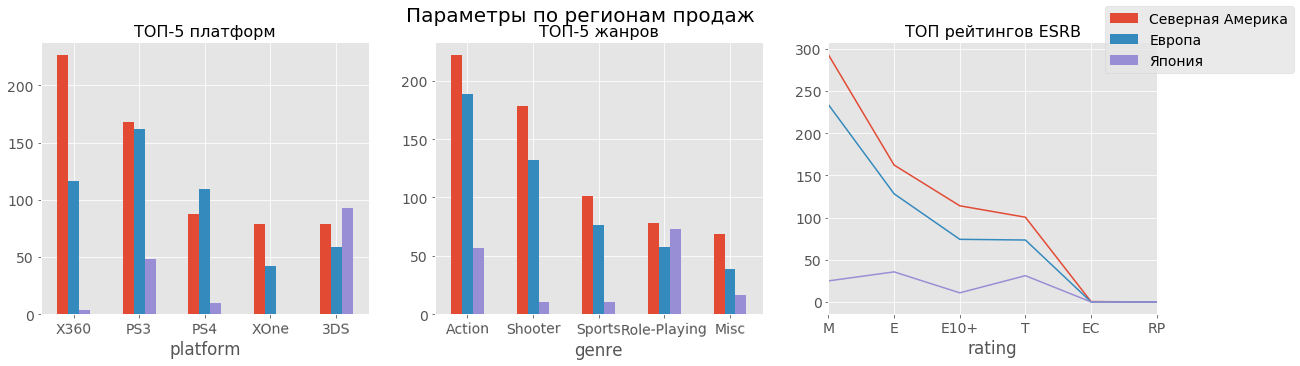

In [85]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

fig, ax = plt.subplots(1,3, figsize = (20,5))

fig.suptitle("Параметры по регионам продаж", fontsize=20)

platforms_change.groupby('platform')[regions].sum()\
    .sort_values(by=regions, ascending = False).head(5).plot(kind = 'bar', ax=ax[0], legend = False, rot=1)
platforms_change.groupby('genre')[regions].sum()\
    .sort_values(by=regions, ascending = False).head(5).plot(kind = 'bar', ax=ax[1], legend = False, rot=1)
platforms_change.groupby('rating')[regions].sum()\
    .sort_values(by=regions, ascending = False).plot(ax=ax[2], legend = False)

ax[0].set_title('ТОП-5 платформ', fontsize=16)
ax[1].set_title('ТОП-5 жанров', fontsize=16)
ax[2].set_title('ТОП рейтингов ESRB', fontsize=16)

fig.legend(('Северная Америка', 'Европа', 'Япония'))


plt.show()

Расшифровка рейтингов:<br>
M - Mature. Игры с элементами насилия, кровью, черным юмором и крепкими выражениями. Возрастной ценз — 17 и более лет; <br>
E - Everyone. Рассчитано на игроков от 6 лет и старше;<br>
E10+ - 	Everyone 10+. Для детей от 10 лет и старше. Такие игры могут содержать элементы Cartoon Violence (мультяшной жестокости);<br>
T - Teen. Реалистичное насилие и грубая лексика, но в небольших количествах. Для игроков от 13 лет;
EC - Early Childhood. Игра разрешена детям от 3 лет и старше;<br>
RP - Rating Pending. Игра уже принята на рассмотрение в ESRB, но итоговый рейтинг получить еще не успела.


<br>

Рынки Северной Америки и Европы схожы между собой и, в свою очередь, значительно отличаются от японского.

Особенности североамериканского и европейского рынков:<br>
- Лидерство платформ X360 & XOne, однако PS3 & PS4 занимают значительную долю рынка;
- жанры - лидеры: Action, Shooter, Sports;
- предпочитаемые рейтинги ESRB: M, E.

Японский рынок:<br>
- в Японии лидируют PS3 & PS4, определённую долю рынка занимает Wii, при этом X360 & XOne практически отсутствуют;
- жанры - лидеры: Role-Playing, Action, Misc;
- предпочитаемые рейтинги ESRB: E, T, M.


Таким образом, очевидны коренные отличия между англо-саксонскими рынками и японским. Различия в предпочитаемых платформах обусловлены присутствием в Японии собственных технических инновационных лидеров - Sony и Nintendo, а в содержании игр - социо-культурными особенностями. Очевидно, что работа на этих рынках требует разных подходов.

<a class="anchor" id="5-bullet"></a>

## 5. Проверка гипотез

Необходимо проверить следующие нулевые гипотезы:<br>
- пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
- пользовательские рейтинги жанров Action и Sports одинаковые.

В обоих случаях проверяются двухстороннние гипотезы о равенстве средних двух генеральных совокупностей, поэтому в качестве метода сравнения будет использоваться метод scipy.stats.ttest_ind. <br> 
Уровень статистической значимости будет принят как 0.05 в связи с отсутствием информации об особом характере исследуемых данных.

In [86]:
XboxOne = platforms_change.query('platform == "XOne"')['user_score'].dropna()
PC = platforms_change.query('platform == "PC"')['user_score'].dropna()

print('Среднее значение пользовательского рейтинга для Xbox One: {:.2f}'.format(XboxOne.mean()))
print('Среднее значение пользовательского рейтинга для PC: {:.2f}'.format(PC.mean()))
print()

alpha = .05

XboxOne_PC_comparision = st.ttest_ind(XboxOne, PC)

print('p-значение: {:.4f}'.format(XboxOne_PC_comparision.pvalue))

if (XboxOne_PC_comparision.pvalue < alpha):
    print ('Гипотеза о равенстве пользовательских рейтингов Xbox One и PC опровергнута.')
else:
    print ('Гипотеза о равенстве пользовательских рейтингов Xbox One и PC не опровергнута.')

Среднее значение пользовательского рейтинга для Xbox One: 6.48
Среднее значение пользовательского рейтинга для PC: 6.48

p-значение: 0.9969
Гипотеза о равенстве пользовательских рейтингов Xbox One и PC не опровергнута.


In [87]:
action = platforms_change.query('genre == "Action"')['user_score'].dropna()
sports = platforms_change.query('genre == "Sports"')['user_score'].dropna()

print('Среднее значение пользовательского рейтинга для жанра "Action": {:.2f}'.format(action.mean()))
print('Среднее значение пользовательского рейтинга для жанра "Sports": {:.2f}'.format(sports.mean()))
print()

alpha = .05

action_sports_comparision = st.ttest_ind(action, sports)

print('p-значение:', action_sports_comparision.pvalue)

if (action_sports_comparision.pvalue < alpha):
    print ('Гипотеза о равенстве пользовательских рейтингов "Action" и "Sports" опровергнута.')
else:
    print ('Гипотеза о равенстве пользовательских рейтингов "Action" и "Sports" не опровергнута.')

Среднее значение пользовательского рейтинга для жанра "Action": 6.80
Среднее значение пользовательского рейтинга для жанра "Sports": 5.69

p-значение: 4.4287702630764084e-21
Гипотеза о равенстве пользовательских рейтингов "Action" и "Sports" опровергнута.


<a class="anchor" id="6-bullet"></a>

## 6.Общий вывод

Очевидно, что происходит трансформация рынка игровых платформ. После бума 2008-2009 годов, когда объём рынка достигал 1,4 млр.долл, уровень 2016 года в 550 млн.долл. указывает на определённые структурные изменения.<br>

На наш взгляд, преждевременно говорить о системном кризисе отрасли, скорее, можно предположить, что отрасль меняется перед новой волной роста. Поясним с учётом полученных в ходе исследования данных.<br>

Бурный рост отрасли совпал с массовым проникновением и развитием компьютерных технологий. Упрощение и миниатюризация аппаратной части, и, как следствие, удешевление игровых решений позволило задействовать экспансивный путь развития за счёт привлечения новых пользователей. Однако в 2012 наступило насыщение рынка, т.к. прорывные технические решения более на рынок не поступали.

Ответом на наступившие изменения стало появление в 2013 году новых платформ от лидеров рынка - Sony (PS4) и Microsoft(XOne). Данные платформы демонстрируют рост продаж, указывая на оправданность своих стратегий.

Таким образом, на текущем этапе при реализации маркетинговой стратегии стоит фокусироваться на продаже игр от лидеров рынка PS4 и XOne, с постоянным мониторингом новинок в рамках контрольной матрицы параметров. С учётом динамики продаж в роли лидера будет выступать PS4.

Жанровое и смысловое содержание игр для акцентирования зависит от географии рынка. Рекламный бюджет на рынках Северной Америки и Европы должен быть нацелен на жанры Action, Shooter, Sports с возрастными рейтингами M, E.<br>

При выходе на рынок Японии лучшие жанры Role-Playing, Action, Misc с возрастными рейтингами - E, T, M. В качестве фокусный платформ целесообразно рассматривать PS4 и DS, т.к. проникновение XOne на японский рынок крайне низко.

Дополнительным фактором для акцента маркетинговых активностей стоит рассматривать рейтинги от критиков не менее 75, при этом для новинок без рейтингов стоит составлять собственное впечатление и рейтинги.